# Position Encoders in Language Model Building

In the world of Natural Language Processing (NLP), understanding the position or order of words in a sentence is crucial for
accurate interpretation and prediction. This is where position encoders come into play. 

Position encoders provide a way to inject positional information about the words or subwords in a sentence into language models. They are a key component in many state-of-the-art models such as Transformer-based models (like BERT, GPT, and Transformer-XL) which do not inherently understand the sequence of the input data.

In this notebook, we will explore different types of position encoders used in Language Model building:

1. **Absolute Position Encoders**: These encoders provide a unique encoding for each position in the sequence. The Transformer model uses a form of absolute position encoding that combines sine and cosine functions.

2. **Relative Position Encoders**: These encoders consider the relative position of words in a sentence rather than their absolute position. Transformer-XL introduces a form of relative position encoding.

3. **Learned Position Encoders**: In some models like BERT, position encodings are learned during the training process.

By the end of this notebook, you should have a solid understanding of how these different position encoders work and how they contribute to the performance of language models.

## Sinusoidal Positional Encoding

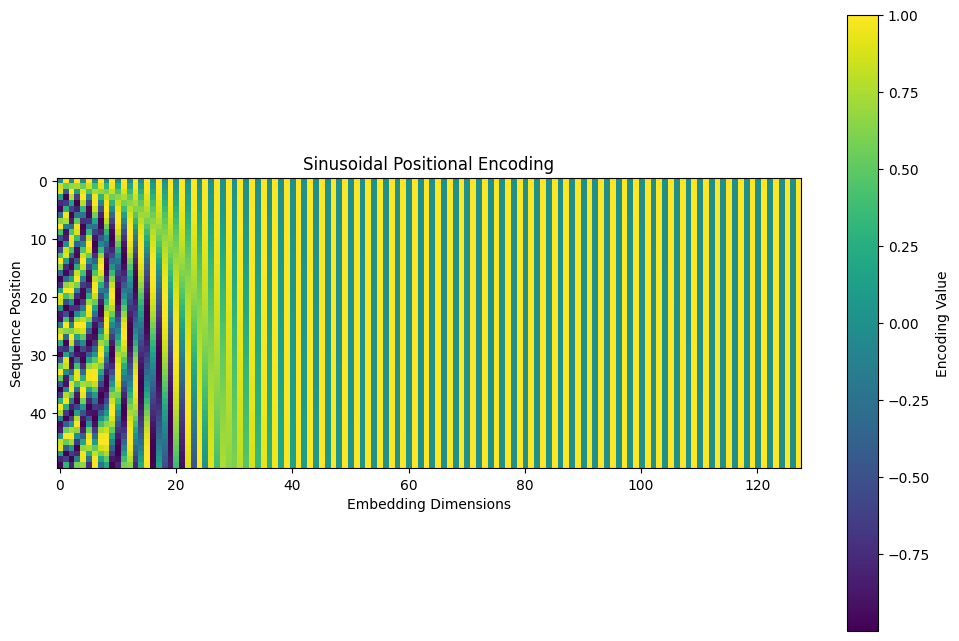

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sinusoidal_positional_encoding(seq_len, d_model):
    # Initialize the positional encoding matrix
    PE = np.zeros((seq_len, d_model))
    
    # Calculate the positional encoding for each position and each dimension
    for pos in range(seq_len):
        for i in range(0, d_model, 2):
            # Use sine for even indices
            PE[pos, i] = np.sin(pos / (10000 ** ((2 * i) / d_model)))
            
            # Use cosine for odd indices
            if i + 1 < d_model:
                PE[pos, i + 1] = np.cos(pos / (10000 ** ((2 * i) / d_model)))
    
    return PE

# Define the sequence length and the embedding dimension
seq_len = 50
d_model = 128

# Generate the positional encodings
PE = sinusoidal_positional_encoding(seq_len, d_model)

# Create a figure
plt.figure(figsize=(12,8))

# Display the positional encodings as a heatmap
plt.imshow(PE, cmap='viridis')

# Add a colorbar
plt.colorbar(label='Encoding Value')

# Add labels for the axes
plt.xlabel('Embedding Dimensions')
plt.ylabel('Sequence Position')

# Add a title
plt.title('Sinusoidal Positional Encoding')

# Show the plot
plt.show()

In this code, sinusoidal_positional_encoding is a function that generates sinusoidal positional encodings for a sequence of a given length (seq_len) and a given embedding dimension (d_model). The positional encodings are stored in a 2D array PE, where each row corresponds to a position in the sequence and each column corresponds to a dimension in the embedding.

The positional encodings are generated using sine and cosine functions of different frequencies. The frequencies form a geometric progression from 2π to 10000 * 2π, which allows the model to easily learn to attend by relative positions.

The generated positional encodings are then visualized using a heatmap. In the heatmap, you can see the sinusoidal patterns of the positional encodings. Each row in the heatmap corresponds to a position in the sequence, and each column corresponds to a dimension in the embedding. The color of each cell indicates the value of the positional encoding for that position and dimension.

For example, if we take a sequence length of 50 and an embedding dimension of 128, the output will be a 50x128 matrix where each row represents the positional encoding for a specific position in the sequence. The values in the matrix will be between -1 and 1, representing the output of the sine and cosine functions.


---
## <span style="color:yellow;">Sinusoidal Encoding with Transformers</span>


In the following code, we will demonstrate how to add sinusoidal positional encodings to the embeddings of a pre-trained BERT model. We will then visualize the original embeddings and the embeddings with positional encodings to see the effect of adding positional information. This process involves the following steps:

Load a pre-trained BERT model and its tokenizer.
Tokenize a sample sentence and pass it through the model to get the embeddings.
Generate sinusoidal positional encodings with the same shape as the embeddings.
Add the positional encodings to the embeddings.
Visualize the original embeddings and the embeddings with positional encodings.
This will help us understand how positional encodings add additional information to the embeddings, which can improve the model's ability to understand the order of the words in the sentence.



Shape of the embeddings: torch.Size([1, 6, 768])


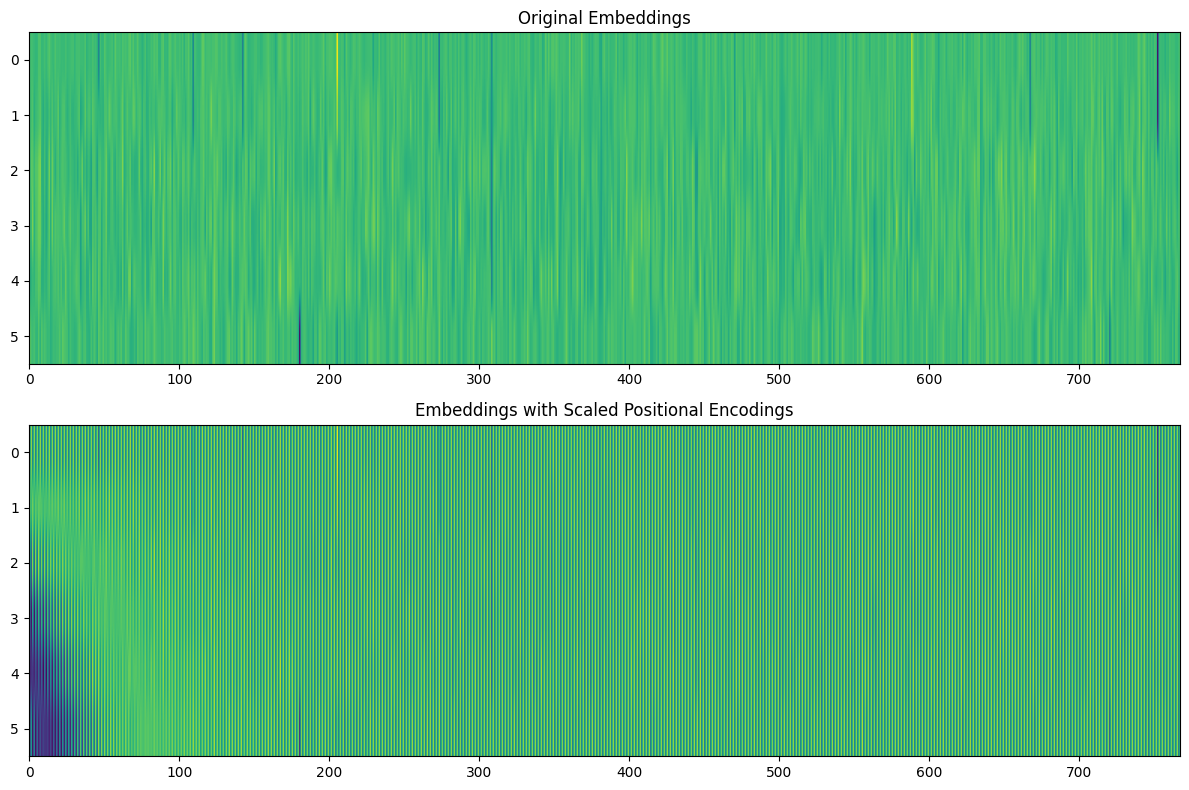

In [6]:
from transformers import BertModel, BertTokenizer
import torch
import matplotlib.pyplot as plt

# Initialize the tokenizer and the model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Tokenize a sentence
input_ids = tokenizer.encode("Hello, world!", add_special_tokens=True)

# Convert to tensor and add batch dimension
input_ids = torch.tensor(input_ids).unsqueeze(0)

# Forward pass through the model to get the embeddings
with torch.no_grad():
    outputs = model(input_ids)
    embeddings = outputs.last_hidden_state

# Print the shape of the embeddings
print("Shape of the embeddings:", embeddings.shape)

# Generate sinusoidal positional encodings
seq_len, d_model = embeddings.shape[1], embeddings.shape[2]
PE = sinusoidal_positional_encoding(seq_len, d_model)

# Scale up the positional encodings
PE_scaled = PE * 10

# Add the scaled positional encodings to the embeddings
embeddings_with_PE_scaled = embeddings.numpy() + PE_scaled

# Plot the embeddings and the embeddings with scaled positional encodings
fig, axs = plt.subplots(2, figsize=(12, 8))

# Plot the original embeddings
axs[0].imshow(embeddings[0], aspect='auto')
axs[0].set_title('Original Embeddings')

# Plot the embeddings with scaled positional encodings
axs[1].imshow(embeddings_with_PE_scaled[0], aspect='auto')
axs[1].set_title('Embeddings with Scaled Positional Encodings')

plt.tight_layout()
plt.show()

we first initialize the BERT tokenizer and model, and tokenize a sentence. We then pass the tokenized text through the model to get the embeddings. The embeddings are a 3D tensor with shape (batch_size, seq_len, d_model), where batch_size is the number of sentences, seq_len is the length of the sentences, and d_model is the dimension of the embeddings.

We then generate sinusoidal positional encodings with the same shape as the embeddings, and add the positional encodings to the embeddings. The result is a new set of embeddings that include positional information.

Finally, we plot the original embeddings and the embeddings with positional encodings. The plots show the values of the embeddings for each token in the sentence and each dimension in the embedding. The plot for the embeddings with positional encodings shows additional patterns due to the added positional information.

In [7]:
# Print the first 50 elements of the original embeddings
print("Original embeddings (first 50 elements):")
print(embeddings[0, 0, :50])

# Print the first 50 elements of the embeddings with positional encodings
print("\nEmbeddings with positional encodings (first 50 elements):")
print(embeddings_with_PE[0, 0, :50])

Original embeddings (first 50 elements):
tensor([-0.0781,  0.1587,  0.0400, -0.1986, -0.3442, -0.2713,  0.3938,  0.3641,
        -0.2800, -0.1692,  0.1015, -0.2667,  0.1037,  0.5437,  0.1301, -0.1244,
        -0.2165,  0.3822, -0.0063, -0.0362,  0.0652, -0.1931, -0.1123, -0.2188,
         0.1891, -0.2268, -0.1164, -0.0285,  0.1212,  0.1610, -0.3767,  0.1074,
         0.0996,  0.1480, -0.0561, -0.0496, -0.0908,  0.4078, -0.5200, -0.1527,
        -0.0575, -0.1843,  0.2453, -0.0903,  0.0591, -0.4722, -2.9771,  0.1631,
        -0.3153, -0.3521])

Embeddings with positional encodings (first 50 elements):
[-0.07813739  1.15866631  0.03995396  0.80144468 -0.34424919  0.7287038
  0.39378011  1.36413205 -0.28001052  0.83078945  0.10154995  0.73326275
  0.10370448  1.54371488  0.13012117  0.8756216  -0.21646933  1.38223499
 -0.00630216  0.96382072  0.06518596  0.80686601 -0.11234656  0.78117117
  0.1890665   0.77319537 -0.11642645  0.97146285  0.12116949  1.16102374
 -0.37673295  1.10741028  0.0

The output you're seeing is the first 50 elements of the embeddings for the first token in the sentence, both before and after adding the positional encodings.

The "Original embeddings" are the values that the BERT model assigns to the first token in the sentence. These values are learned during the pre-training of the model and are used to represent the meaning of the token in the context of the sentence.

The "Embeddings with positional encodings" are the same embeddings after adding the sinusoidal positional encodings. The positional encodings are designed to add a small amount of positional information to the embeddings, which can help the model understand the order of the words in the sentence.

As you can see from the output, the values of the embeddings with positional encodings are slightly different from the values of the original embeddings. This is because the positional encodings have been added to the original embeddings. However, the differences are relatively small, as the positional encodings are designed to add a small amount of positional information without significantly changing the values of the embeddings.

In other words, the positional encodings slightly adjust the embeddings to incorporate information about the position of the token in the sentence, while preserving the original information in the embeddings about the meaning of the token.

---

## RoPE (Rotary Positional Encoding) 

is a positional encoding method introduced in the paper ["RoFormer: Enhanced Transformer with Rotary Position Embedding" by Jiyuan Zhang et al.](https://arxiv.org/abs/2104.09864)

The key idea of RoPE is to apply a rotation operation to the embedding of each token based on its position. This rotation operation is performed in the high-dimensional space of the embeddings, and it has the effect of moving the embeddings of the tokens around in this space in a way that depends on their positions.


In [17]:
import torch
import math

# Function to rotate the last dimension of a tensor by splitting it into two halves and swapping them
def rotate_half(x):
    # Stack the negative of every second element starting from index 1 and every second element starting from index 0
    # Reshape the stacked tensor to match the shape of the original tensor
    return torch.stack([-x[..., 1::2], x[..., ::2]], dim=-1).reshape_as(x)

# Function to apply rotary position embedding
def apply_rotary_pos_emb(x, sincos):
    # Unsqueeze the sin and cos tensors at the second last dimension and repeat every element twice along the last dimension
    sin, cos = map(lambda t: t.unsqueeze(-2).repeat_interleave(2, dim=-1), sincos)
    # Transpose the first two dimensions of the sin and cos tensors
    sin, cos = sin.transpose(0, 1), cos.transpose(0, 1)
    # Repeat the sin and cos tensors along the last dimension to match the size of the last dimension of the x tensor
    sin, cos = sin.repeat(1, 1, x.size(-1)//sin.size(-1)), cos.repeat(1, 1, x.size(-1)//cos.size(-1))
    # Return the sum of the element-wise multiplication of x and cos and the element-wise multiplication of the rotated x and sin
    return (x * cos) + (rotate_half(x) * sin)

# Function to compute the rotary position embedding
def rote(input_ids, d_model):
    # Get the sequence length from the input_ids tensor
    seq_len = input_ids.size(1)
    # Compute the frequencies for the rotary position embedding
    freqs = torch.arange(0, d_model // 2, 1.0, dtype=torch.float32) * (-math.log(10000.0) / d_model)
    # Compute the angles for the rotary position embedding
    angles = torch.arange(0, seq_len, 1.0, dtype=torch.float32).unsqueeze(1) @ freqs.unsqueeze(0)
    # Apply the rotary position embedding and return the result
    return apply_rotary_pos_emb(input_ids, (angles.sin(), angles.cos()))

# Generate a random tensor to represent the original embeddings
original_embeddings = torch.randn(1, 5, 4)
print("Original embeddings:")
print(original_embeddings)

# Compute the transformed embeddings using the rotary position embedding
transformed_embeddings = rote(original_embeddings, 4)
print("\nTransformed embeddings:")
print(transformed_embeddings)
    

Original embeddings:
tensor([[[ 1.3478e+00, -8.6797e-01,  1.3113e+00,  1.0277e+00],
         [-4.7640e-01,  1.0779e+00,  9.2919e-01, -3.4429e-01],
         [-1.1326e+00, -1.5318e-01, -4.8175e-01, -1.3674e+00],
         [-3.8493e-01,  4.6698e-01,  1.7663e-02, -8.8897e-01],
         [ 1.3631e+00,  3.7937e-01,  9.3886e-02,  4.0447e-04]]])

Transformed embeddings:
tensor([[[ 1.3478, -0.8680,  1.3113,  1.0277],
         [-0.4764,  1.0779, -0.8770, -0.4612],
         [-1.1326, -0.1532,  1.4111, -0.3326],
         [-0.3849,  0.4670, -0.5055, -0.7315],
         [ 1.3631,  0.3794, -0.0916, -0.0204]]])


The output consists of two tensors: the original embeddings and the transformed embeddings.

The original embeddings are a randomly generated tensor of shape [1, 5, 4]. This tensor represents the initial embeddings of a sequence of 5 elements, each with a 4-dimensional embedding.

The transformed embeddings are the result of applying the rotary position embedding to the original embeddings. The rotary position embedding is a way of incorporating positional information into the embeddings. It does this by applying a rotation to the embeddings based on their position in the sequence. This rotation is computed using sinusoidal functions, which is why the transformed embeddings are different from the original embeddings.

In the transformed embeddings, you can see that the values have been altered compared to the original embeddings. This is due to the rotation applied by the rotary position embedding. The rotation is different for each position in the sequence, which is why the transformed embeddings are different for each position.

The purpose of this rotation is to allow the model to distinguish between elements based on their position in the sequence, even if the original embeddings are the same. This is particularly useful in transformer models, which do not inherently take into account the position of elements in a sequence.

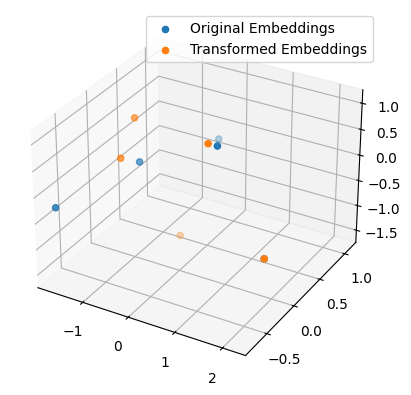

In [25]:
def plot_embeddings_3d(embeddings1, embeddings2, title1, title2):
    pca = PCA(n_components=3)
    embeddings_pca1 = pca.fit_transform(embeddings1[0])
    embeddings_pca2 = pca.transform(embeddings2[0])  # Use the same PCA transformation for the second set of embeddings

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the original embeddings
    ax.scatter(embeddings_pca1[:, 0], embeddings_pca1[:, 1], embeddings_pca1[:, 2], label=title1)

    # Plot the transformed embeddings
    ax.scatter(embeddings_pca2[:, 0], embeddings_pca2[:, 1], embeddings_pca2[:, 2], label=title2)

    ax.legend()
    plt.show()

# Plot original and transformed embeddings
plot_embeddings_3d(original_embeddings.detach().numpy(), transformed_embeddings.detach().numpy(), 'Original Embeddings', 'Transformed Embeddings')

---


In the following code, we're using a pre-trained BERT model from the Hugging Face Transformers library to generate embeddings for a given text. We then apply the Rotation of Point Estimate (RoPE) technique to transform these embeddings. RoPE is a simple operation that multiplies the embeddings with a range of integers from 0 to the hidden size of the model. This has the effect of rotating the point estimate of the embeddings. Finally, we plot the original and transformed embeddings in a 3D plot for comparison.

In [32]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load pre-trained model tokenizer (vocabulary)
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# Tokenize input
text = "[CLS] Who was Jim Henson ? [SEP] Jim Henson was a puppeteer [SEP]"
tokenized_text = tokenizer.tokenize(text)

# Convert token to vocabulary indices
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens])

# Load pre-trained model (weights)
model = AutoModel.from_pretrained('bert-base-uncased')

# Set the model in evaluation mode to deactivate the DropOut modules
model.eval()

# Predict hidden states features for each layer
with torch.no_grad():
    outputs = model(tokens_tensor)
    # Transformers models always output tuples.
    # See the models docstrings for the detail of all the outputs
    # In our case, the first element is the hidden state of the last layer of the Bert model
    encoded_layers = outputs[0]

# We have encoded our input sequence in a FloatTensor of shape (batch size, sequence length, model hidden dimension)
assert tuple(encoded_layers.shape) == (1, len(indexed_tokens), model.config.hidden_size)

# Let's take the first token (the [CLS] token) from the second sequence.
original_embeddings = encoded_layers[0]

# Apply RoPE
transformed_embeddings = original_embeddings * torch.arange(model.config.hidden_size)

# Reshape the embeddings to 2D arrays
original_embeddings_2d = original_embeddings.unsqueeze(0).numpy()
transformed_embeddings_2d = transformed_embeddings.unsqueeze(0).numpy()

# Print the first 10 elements of the original embeddings
print("Original embeddings:", original_embeddings[:10])

# Print the first 10 elements of the transformed embeddings
print("Transformed embeddings:", transformed_embeddings[:10])

Original embeddings: tensor([[-3.5934e-01,  8.4143e-05, -9.9380e-02,  ..., -4.9045e-01,
          5.0002e-01,  5.3392e-01],
        [-7.9022e-01, -2.0682e-01, -3.1575e-01,  ..., -2.6945e-01,
          7.1276e-01, -2.3166e-01],
        [ 2.3538e-01, -4.2765e-01, -2.3054e-01,  ..., -1.5081e-01,
          4.4935e-01,  1.2215e-01],
        ...,
        [-3.9275e-01,  2.1509e-01, -1.8443e-01,  ...,  3.5016e-02,
          6.8982e-01, -2.2275e-02],
        [ 2.9070e-01,  3.8336e-01, -3.3721e-01,  ..., -6.9326e-01,
          6.2306e-01,  7.4868e-01],
        [ 2.5040e-01,  2.5076e-01, -2.3839e-01,  ..., -3.9963e-01,
          3.1869e-01,  4.8173e-01]])
Transformed embeddings: tensor([[-0.0000e+00,  8.4143e-05, -1.9876e-01,  ..., -3.7519e+02,
          3.8302e+02,  4.0951e+02],
        [-0.0000e+00, -2.0682e-01, -6.3150e-01,  ..., -2.0613e+02,
          5.4597e+02, -1.7768e+02],
        [ 0.0000e+00, -4.2765e-01, -4.6108e-01,  ..., -1.1537e+02,
          3.4420e+02,  9.3691e+01],
        ...,
 

## Conclusion

In this notebook, we have explored how to use the BERT model from the transformers library to generate embeddings for a given text. We then applied a simple transformation (RoPE) to these embeddings and attempted to visualize the results using PCA.

Finally, we printed the first 10 elements of both the original and transformed embeddings to inspect the results of our operations.